# Python Tutorial - How to work with CoastWatch data in Python

This tutorial is based on the OceanWatch tutorial meterial edited with Great Lakes data. This tutorial will show the steps to grab data in ERDDAP from Python, how to work with NetCDF files in Python and how to make some maps and time-series water surface temperature (sst) in Lake Erie.

## 1. Downlading data from Python

Because ERDDAP includes RESTful services, you can download data listed on any ERDDAP platform from Python using the URL structure. For example, the following page allows you to subset daily water surface temperature data from the dataset GLSEA_ACSPO_GCS

![](gl_erddap_glsea.png)

In this specific example, the URL we generated is :

https://apps.glerl.noaa.gov/erddap/griddap/GLSEA_ACSPO_GCS.nc?sst%5B(2023-06-01T12:00:00Z):1:(2023-06-30T12:00:00Z)%5D%5B(41):1:(43)%5D%5B(-83.5):1:(-78.5)%5D


In Python, run the following to download the data using the generated URL. **Note:** replace coastwatch.glerl.noaa.gov with apps.glerl.noaa.gov) :


In [1]:
import xarray as xr
import pandas as pd
import numpy as np


In [2]:
import urllib.request

#url="https://apps.glerl.noaa.gov/erddap/griddap/GLSEA_ACSPO_GCS.csv?sst%5B(2023-06-01T12:00:00Z):1:(2023-06-30T12:00:00Z)%5D%5B(41):1:(43)%5D%5B(-83.5):1:(-78.5)%5D"
#urllib.request.urlretrieve(url, "e_sst.csv")

url="https://apps.glerl.noaa.gov/erddap/griddap/GLSEA_ACSPO_GCS.csv?sst%5B(2023-06-01T12:00:00Z):1:(2023-06-30T12:00:00Z)%5D%5B(41):1:(43)%5D%5B(-83.5):1:(-78.5)%5D"
urllib.request.urlretrieve(url, "e_sst.csv")

#url='https://apps.glerl.noaa.gov/erddap/griddap/GLSEA_ACSPO_GCS.asc?sst%5B(2024-03-01T12:00:00Z):1:(2024-05-05T12:00:00Z)%5D%5B(38.8749871947297):1:(50.6059751976539)%5D%5B(-92.4199507342304):1:(-75.8816402880531)%5D'
#urllib.request.urlretrieve(url, "e_sst.asc")

#url='https://apps.glerl.noaa.gov/erddap/griddap/GLSEA_ACSPO_GCS.dods?sst%5B(2024-03-01T12:00:00Z):1:(2024-05-05T12:00:00Z)%5D%5B(38.8749871947297):1:(50.6059751976539)%5D%5B(-92.4199507342304):1:(-75.8816402880531)%5D'
#urllib.request.urlretrieve(url, "e_sst.dods")

#url='https://apps.glerl.noaa.gov/erddap/griddap/GLSEA_ACSPO_GCS.das?sst%5B(2024-03-01T12:00:00Z):1:(2024-05-05T12:00:00Z)%5D%5B(38.8749871947297):1:(50.6059751976539)%5D%5B(-92.4199507342304):1:(-75.8816402880531)%5D'
#urllib.request.urlretrieve(url, "e_sst.das")


('e_sst.csv', <http.client.HTTPMessage at 0x20096466a10>)

In [3]:
import pandas as pd

#df = pd.read_csv('e_sst.csv', skiprows=9,delimiter=r'\s+', header=None, names=['YEAR', 'JD', 'S', 'M', 'H', 'E', 'O','St'], dtype=np.float64)
df = pd.read_csv('e_sst.csv', skiprows=2,  header=None, names=['time', 'lat', 'lon','sst'])

#df = pd.read_csv('e_sst.csv',  skiprows=2,  header=None)
#print(df.values)
#print(df.info)
print(df.head)
print(df.values[0][0])
print(df.values[0][1])
print(df.values[1][2])
print(df.values[0][3])

<bound method NDFrame.head of                          time        lat        lon  sst
0        2023-06-01T12:00:00Z  41.005346 -83.506082  NaN
1        2023-06-01T12:00:00Z  41.005346 -83.492066  NaN
2        2023-06-01T12:00:00Z  41.005346 -83.478051  NaN
3        2023-06-01T12:00:00Z  41.005346 -83.464035  NaN
4        2023-06-01T12:00:00Z  41.005346 -83.450020  NaN
...                       ...        ...        ...  ...
1535815  2023-06-30T12:00:00Z  42.995549 -78.558604  NaN
1535816  2023-06-30T12:00:00Z  42.995549 -78.544589  NaN
1535817  2023-06-30T12:00:00Z  42.995549 -78.530573  NaN
1535818  2023-06-30T12:00:00Z  42.995549 -78.516558  NaN
1535819  2023-06-30T12:00:00Z  42.995549 -78.502542  NaN

[1535820 rows x 4 columns]>
2023-06-01T12:00:00Z
41.0053458284746
-83.4920661967601
nan


In [44]:
a = np.arange(6).reshape((3, 2))
print(a)
b = np.arange(6)
print(b)


[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]


In [52]:
time_set = set()
lat_set = set()
lon_set = set()
sst_list = list()

for d in df.values:
    time_set.add(d[0])
    lat_set.add(d[1])
    lon_set.add(d[2])
    sst_list.append(d[3])

time_list = list(sorted(time_set))
print(time_list)
print(len(time_list))
lat_list = list(sorted(lat_set))
lon_list = list(sorted(lon_set))
print(lat_list)
print(len(lat_list))
print(lon_list)
print(len(lon_list))
#sst = np.reshape()
#a = np.arange(6).reshape((3, 2))
sst = np.array(sst_list).reshape(len(time_list), len(lat_list), len(lon_list))
print(sst)

['2023-06-01T12:00:00Z', '2023-06-02T12:00:00Z', '2023-06-03T12:00:00Z', '2023-06-04T12:00:00Z', '2023-06-05T12:00:00Z', '2023-06-06T12:00:00Z', '2023-06-07T12:00:00Z', '2023-06-08T12:00:00Z', '2023-06-09T12:00:00Z', '2023-06-10T12:00:00Z', '2023-06-11T12:00:00Z', '2023-06-12T12:00:00Z', '2023-06-13T12:00:00Z', '2023-06-14T12:00:00Z', '2023-06-15T12:00:00Z', '2023-06-16T12:00:00Z', '2023-06-17T12:00:00Z', '2023-06-18T12:00:00Z', '2023-06-19T12:00:00Z', '2023-06-20T12:00:00Z', '2023-06-21T12:00:00Z', '2023-06-22T12:00:00Z', '2023-06-23T12:00:00Z', '2023-06-24T12:00:00Z', '2023-06-25T12:00:00Z', '2023-06-26T12:00:00Z', '2023-06-27T12:00:00Z', '2023-06-28T12:00:00Z', '2023-06-29T12:00:00Z', '2023-06-30T12:00:00Z']
30
[41.0053458284746, 41.0193613458019, 41.0333768631292, 41.0473923804564, 41.0614078977837, 41.075423415111, 41.0894389324382, 41.1034544497655, 41.1174699670928, 41.13148548442, 41.1455010017473, 41.1595165190746, 41.1735320364019, 41.1875475537291, 41.2015630710564, 41.21557

In [53]:
  
#time = pd.date_range("2014-09-06", periods=3)
#print(time)

ds = xr.Dataset(
    data_vars=dict(
        sst=(["time", "latitude", "longitude"], sst),
         
    ),
    coords=dict(
         time=time_list,        
         latitude=(["latitude"], lat_list),
         longitude=(["longitude"], lon_list),    
    ),
    attrs=dict(description="Weather surface temperature"),
)

print(ds)

<xarray.Dataset>
Dimensions:    (time: 30, latitude: 143, longitude: 358)
Coordinates:
  * time       (time) <U20 '2023-06-01T12:00:00Z' ... '2023-06-30T12:00:00Z'
  * latitude   (latitude) float64 41.01 41.02 41.03 41.05 ... 42.97 42.98 43.0
  * longitude  (longitude) float64 -83.51 -83.49 -83.48 ... -78.53 -78.52 -78.5
Data variables:
    sst        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes:
    description:  Weather surface temperature


# 2. Importing NetCDF4 data in Python

Now that we've downloaded the data locally, we can import it and extract our variables of interest.

The xarray package makes it very convenient to work with NetCDF files. Documentation is available here:
http://xarray.pydata.org/en/stable/why-xarray.html

In [94]:
import xarray as xr
#import netCDF4 as nc

#### - Open the file and load it as an xarray dataset:

In [95]:
ds = xr.open_dataset('e_sst.csv',decode_cf=False)
#ds = xr.open_dataset('e_sst.nc')

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

#### - Examine the data structure:

In [54]:
ds

<xarray.Dataset>
Dimensions:    (time: 30, latitude: 143, longitude: 358)
Coordinates:
  * time       (time) <U20 '2023-06-01T12:00:00Z' ... '2023-06-30T12:00:00Z'
  * latitude   (latitude) float64 41.01 41.02 41.03 41.05 ... 42.97 42.98 43.0
  * longitude  (longitude) float64 -83.51 -83.49 -83.48 ... -78.53 -78.52 -78.5
Data variables:
    sst        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes:
    description:  Weather surface temperature

In [55]:
print(ds)

<xarray.Dataset>
Dimensions:    (time: 30, latitude: 143, longitude: 358)
Coordinates:
  * time       (time) <U20 '2023-06-01T12:00:00Z' ... '2023-06-30T12:00:00Z'
  * latitude   (latitude) float64 41.01 41.02 41.03 41.05 ... 42.97 42.98 43.0
  * longitude  (longitude) float64 -83.51 -83.49 -83.48 ... -78.53 -78.52 -78.5
Data variables:
    sst        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes:
    description:  Weather surface temperature


#### - Examine which coordinates and variables are included in the dataset:

In [ ]:
#ds.dims

In [56]:
ds.coords

Coordinates:
  * time       (time) <U20 '2023-06-01T12:00:00Z' ... '2023-06-30T12:00:00Z'
  * latitude   (latitude) float64 41.01 41.02 41.03 41.05 ... 42.97 42.98 43.0
  * longitude  (longitude) float64 -83.51 -83.49 -83.48 ... -78.53 -78.52 -78.5

In [57]:
ds.data_vars

Data variables:
    sst      (time, latitude, longitude) float64 nan nan nan nan ... nan nan nan

In [ ]:
ds.attrs

#### - Examine the structure of sst:

In [58]:
ds.sst.shape

(30, 143, 358)

Our dataset is a 3-D array with 143 rows corresponding to latitudes and 358 columns corresponding to longitudes,  for each of the 30 time steps.

#### - Get the dates for each time step:

In [59]:
ds.time

<xarray.DataArray 'time' (time: 30)>
array(['2023-06-01T12:00:00Z', '2023-06-02T12:00:00Z', '2023-06-03T12:00:00Z',
       '2023-06-04T12:00:00Z', '2023-06-05T12:00:00Z', '2023-06-06T12:00:00Z',
       '2023-06-07T12:00:00Z', '2023-06-08T12:00:00Z', '2023-06-09T12:00:00Z',
       '2023-06-10T12:00:00Z', '2023-06-11T12:00:00Z', '2023-06-12T12:00:00Z',
       '2023-06-13T12:00:00Z', '2023-06-14T12:00:00Z', '2023-06-15T12:00:00Z',
       '2023-06-16T12:00:00Z', '2023-06-17T12:00:00Z', '2023-06-18T12:00:00Z',
       '2023-06-19T12:00:00Z', '2023-06-20T12:00:00Z', '2023-06-21T12:00:00Z',
       '2023-06-22T12:00:00Z', '2023-06-23T12:00:00Z', '2023-06-24T12:00:00Z',
       '2023-06-25T12:00:00Z', '2023-06-26T12:00:00Z', '2023-06-27T12:00:00Z',
       '2023-06-28T12:00:00Z', '2023-06-29T12:00:00Z', '2023-06-30T12:00:00Z'],
      dtype='<U20')
Coordinates:
  * time     (time) <U20 '2023-06-01T12:00:00Z' ... '2023-06-30T12:00:00Z'

In [60]:
ds.time.attrs

{}

#### the time units is seconds, we need to convert the seconds to dates.

In [ ]:
dates=nc.num2date(ds.time,ds.time.units,only_use_cftime_datetimes=False, 
                        only_use_python_datetimes=True )
dates

The datetime object includes year, month, hour, minutes, eg. 2021, 6, 12, 0.

## Working with the extracted data

### Creating a map for one time step

Let's create a map of SST for June 1, 2021 (our first time step).

In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#np.warnings.filterwarnings('ignore')

#### - Examine the values of sst:

In [ ]:
ds.sst.values

In [ ]:
ds.sst.attrs

In [ ]:
ds.sst.attrs['_FillValue']

In [ ]:
#ds.sst.dims
#ds.sst.coords

#### - Make a new sst DataArray and replace _fillValue with NaN

In [ ]:
#nan_sst = ds.sst.where(ds.sst.values != -99999.0)
nan_sst = ds.sst.where(ds.sst.values != ds.sst.attrs['_FillValue'])

# nan_sst[time][latitude][longitude]
#print(nan_sst[10][100][200])

print(nan_sst)



#### - Set some color breaks

In [61]:
np.nanmin(ds.sst)


13.25

In [62]:
# find min value in sst
np.nanmin(ds.sst)

13.25

In [63]:
np.nanmax(ds.sst)

23.35

In [64]:
levs = np.arange(13.25, 23.35, 0.05)
len(levs)

203

#### - Define a color palette

In [65]:
# init a color list
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]


#### - Set color scale using the jet palette

In [66]:
cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))

#https://www.youtube.com/watch?v=qk0n-YaKIkY

NameError: name 'LinearSegmentedColormap' is not defined

#### - plot the SST map

In [67]:
np.linspace(-82.5,-80,num=4)


array([-82.5       , -81.66666667, -80.83333333, -80.        ])

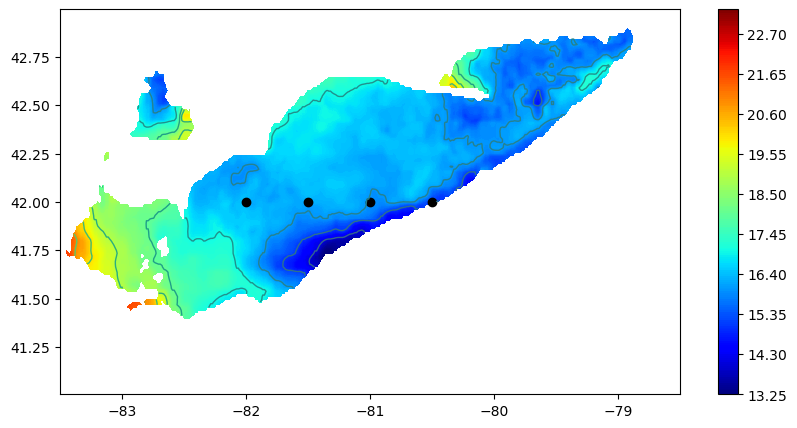

In [72]:
plt.subplots(figsize=(10, 5))

#plot first sst image: nan_sst[0,:,:]
plt.contourf(ds.sst.longitude, ds.sst.latitude, ds.sst[0,:,:], levs,cmap='jet')

#plot the color scale
plt.colorbar()

#example of how to add points to the map
plt.scatter(np.linspace(-82,-80.5,num=4),np.repeat(42,4),c='black')

#example of how to add a contour line
step = np.arange(9,26, 1)

plt.contour(ds.longitude, ds.latitude, ds.sst[0,:,:],levels=step,linewidths=1)

#plot title
#plt.title("Lake Erie Water Surface Temperature - " + dates[0].strftime('%b %d, %Y'))
plt.show()


### Plotting a time series

Let's pick the following box : 41.75-42.0N, 83.0-83.5W. We are going to generate a time series of mean SST within that box.

#### - first, let's subset our data:

In [ ]:
lat_bnds, lon_bnds = [41.75, 42.0], [-83.5, -83.0]
a_sst=nan_sst.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
print(a_sst)

#### - let's plot the subset:

In [ ]:
#plot first image of the a_sst array
plt.contourf(a_sst.longitude, a_sst.latitude, a_sst[0,:,:], levs,cmap=cm)
plt.colorbar()
plt.title("Subset of Lake Erie Water Surface Temperature " + dates[0].strftime('%b %d, %Y'))
plt.show()

#### - let's compute the daily mean over the bounding region:

In [ ]:
res=np.nanmean(a_sst,axis=(1,2))
res


#### - let's plot the time-series:

In [ ]:
plt.figure(figsize=(8,4))

plt.scatter(dates,res)

degree_sign = u"\N{DEGREE SIGN}"
plt.ylabel('SST (' + degree_sign + 'C)')

plt.xlim(dates[0], dates[-1])

plt.xticks(dates,rotation=70, fontsize=10 )
plt.show()

### Creating a map of average SST over a month

#### - let's compute the monthly mean for the region:

In [ ]:
import warnings

warnings.filterwarnings('ignore')
mean_sst=np.nanmean(nan_sst,axis=0)

In [ ]:
mean_sst.shape

#### - let's plot the map of the average SST in the region for 2021 June:

In [ ]:
plt.subplots(figsize=(10, 5))

plt.contourf(ds.longitude, ds.latitude, mean_sst, levs,cmap=cm)

cbar = plt.colorbar()
cbar.set_label('SST')

plt.title("Mean SST " + dates[0].strftime('%Y-%m-%d')+' - '+dates[-1].strftime('%Y-%m-%d'))
plt.show()

In [ ]:
!jupyter nbconvert --to html GL_python_tutorial1.ipynb

In [50]:
np.random.seed(0)
sst = 15 + 8 * np.random.randn(3, 4, 5)
print(sst)
lon = [-99.83, -99.32, -99.79, -99.23, -99.0]
lat = [42.25, 42.21, 42.63, 42.59]
print(lon)
print(lat)
time = pd.date_range("2014-09-06", periods=3)
print(time)

ds = xr.Dataset(
    data_vars=dict(
        sst=(["time", "latitude", "longitude"], sst),
         
    ),
    coords=dict(
         time=time,        
         latitude=(["latitude"], lat),
         longitude=(["longitude"], lon),    
    ),
    attrs=dict(description="Weather surface temperature"),
)

print(ds)

[[[29.11241877 18.20125767 22.82990387 32.92714559 29.94046392]
  [ 7.18177696 22.60070734 13.78914233 14.17424919 18.28478802]
  [16.15234857 26.63418806 21.0883018  15.97340013 18.55090586]
  [17.66939462 26.95263259 13.35873389 17.50454161  8.16723409]]

 [[-5.42391853 20.22894876 21.91548959  9.06267984 33.15803699]
  [ 3.3650746  15.36606814 13.5025292  27.26223371 26.75487016]
  [16.23957941 18.02530016  7.89771402 -0.84637175 12.21670281]
  [16.25079175 24.84232545 24.61903879 11.90138546 12.581578  ]]

 [[ 6.61157628  3.6398565   1.34983847 30.60620316 10.92278255]
  [11.49540559  4.97763712 21.21992285  2.08881722 13.29807776]
  [ 7.83626751 18.09521998 10.9135589   5.55494253 14.77454217]
  [18.42665496 15.53213778 17.41977518  9.92542325 12.09807067]]]
[-99.83, -99.32, -99.79, -99.23, -99.0]
[42.25, 42.21, 42.63, 42.59]
DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', freq='D')
<xarray.Dataset>
Dimensions:    (time: 3, latitude: 4, longitude: